In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar

In [3]:
pwd = os.getcwd()
path = pwd + '/Sales_Data/' ### Path of the file 

In [108]:
df = pd.read_csv(path + 'Sales_April_2019.csv') # test 

all_months_data = pd.DataFrame()  

files = [file for file in os.listdir(path)] 

for file in files:    #### finction to import all files and merge the files into one file 
    df =pd.read_csv(path + file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv('all_data.csv', index=False) ## save the file 

In [2]:
all_data = pd.read_csv('all_data.csv') ## read the file
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Cleaning and Preparing the Data

In [11]:
all_data['MonthNr'] = all_data['Order Date'].str[0:2] ### to get the month number
all_data

C:\Users\khale\AppData\Local\Temp\ipykernel_11608\4106975644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['MonthNr'] = all_data['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNr
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [21]:
all_data['Month'] = all_data['MonthNr'].apply(lambda x: calendar.month_abbr[x]) ### create new column (month) and convert month number to name 

In [20]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] ### To get the Sales

In [25]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [16]:
def city (adress):
    return adress.split(',')[1]

#def state (adress):
 #   return adress.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: city(x))  ### finction to get the city
all_data

C:\Users\khale\AppData\Local\Temp\ipykernel_11608\1407065652.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: city(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNr,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco


In [7]:
nan_df =  all_data[all_data.isnull().any(axis=1)] ### find nan
all_data.dropna(inplace=True) ### Drop nan
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,MonthNr


In [17]:
all_data = all_data.loc[all_data['MonthNr'] != 'Or'] ### delete all rows that have Or

In [18]:
all_data['MonthNr'] = all_data['MonthNr'].astype('int32')

In [19]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [26]:
all_data['Hour'] = all_data['Hour'].astype('int32')

all_data['Hour'].dtype

dtype('int32')

In [22]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\khale\AppData\Local\Temp\ipykernel_11608\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [27]:
all_data = all_data[['Order ID','Product','Quantity Ordered','Price Each','Sales','Order Date','MonthNr','Month' ,'Hour','Purchase Address','City']]

In [28]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,MonthNr,Month,Hour,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,Apr,8,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,Apr,22,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,Apr,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,Apr,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,Apr,9,"333 8th St, Los Angeles, CA 90001",Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,9,Sep,20,"840 Highland St, Los Angeles, CA 90001",Los Angeles
186846,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,9,Sep,16,"216 Dogwood St, San Francisco, CA 94016",San Francisco
186847,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,9,Sep,7,"220 12th St, San Francisco, CA 94016",San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,9,Sep,17,"511 Forest St, San Francisco, CA 94016",San Francisco


In [59]:
all_data.to_csv('final_data.csv') 

### Q1: What was the best month for sales? How much was earned that month?

In [56]:
all_data['MonthNr'] = all_data['MonthNr'].astype('int32')

all_data['MonthNr'].dtype

dtype('int32')

In [55]:
grouped_month = all_data.groupby('MonthNr').sum()
grouped_month[['Quantity Ordered','Sales']]


TypeError: datetime64 type does not support sum operations

In [177]:
#grouped_month['Sales'].max() #4613443.34
grouped_month[['Quantity Ordered','Price Each','Sales']].loc[grouped_month['Sales'] == 4613443.34]  ### Best Month 12

,Quantity Ordered,Price Each,Sales
MonthNr,,,
12,28114,4588415.41,4613443.34


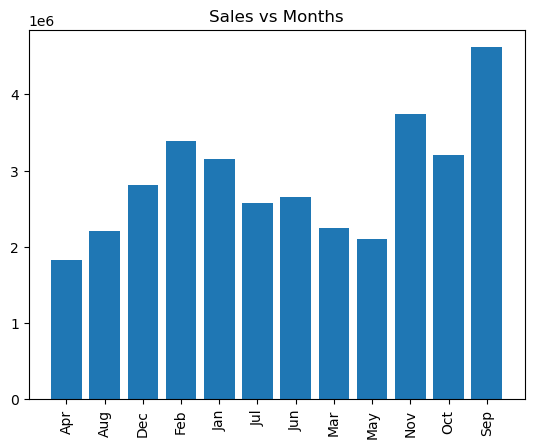

In [178]:
months = [month for month , df in all_data.groupby('Month')]
value = grouped_month['Sales']
plt.bar(months,value)
plt.xticks(months,rotation = 'vertical' , size = 10)
plt.title('Sales vs Months')
plt.show()

### Q2: What is the City with the most sales?

In [179]:
grouped_city = all_data.groupby('City').sum()
grouped_city[['Quantity Ordered','Sales']]

C:\Users\khale\AppData\Local\Temp\ipykernel_2000\33648170.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_city = all_data.groupby('City').sum()


,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


In [181]:
grouped_city[['Sales']].max() ## 8262203.91

grouped_city[['Quantity Ordered','Sales']].loc[grouped_city['Sales']  == 8262203.91]  ### Best Month 12 San Francisco

,Quantity Ordered,Sales
City,,
San Francisco (CA),50239,8262203.91


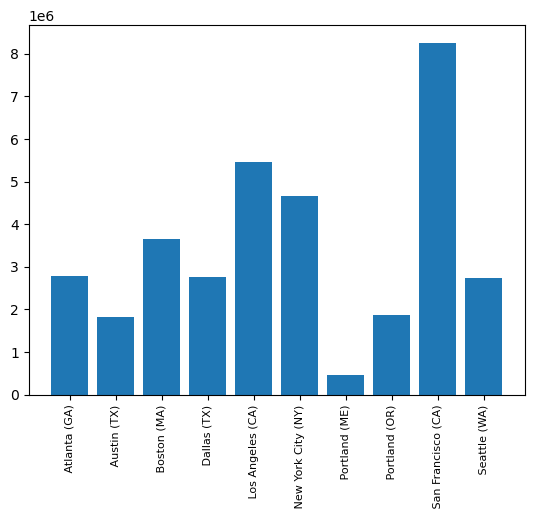

In [182]:
cities = [city for city , df in all_data.groupby('City')]

value = grouped_city['Sales']

plt.bar(cities,value)

plt.xticks(cities, rotation='vertical' , size = 8)

plt.show()


### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [183]:
grouped_hour = all_data.groupby('Hour').count()
grouped_hour[['Sales']].max() ##12905
grouped_hour[['Quantity Ordered','Sales']].loc[grouped_hour['Sales']  == 12905] ## Best hour for ads

,Quantity Ordered,Sales
Hour,,
19,12905,12905


In [184]:
grouped_hour[['Sales']].sort_values(by=['Sales'],ascending=False).head(10)

#items_df.sort_values(by=['ItemsNr'], ascending=False).head(10)

,Sales
Hour,
19,12905
12,12587
11,12411
18,12280
20,12228
13,12129
14,10984
10,10944
21,10921


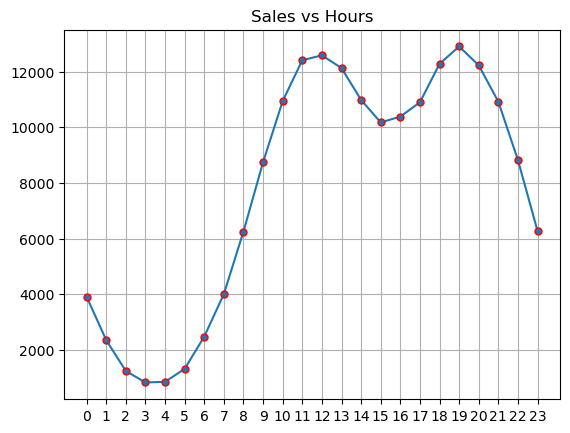

In [186]:

hours = [hour for hour , df in all_data.groupby('Hour')]
values = grouped_hour['Sales']
plt.plot(hours, values ,marker = '.' ,markeredgecolor ='red' ,markersize = 10)
plt.xticks(hours)
plt.grid()
plt.title('Sales vs Hours')
plt.show()



### Q4: What products are most often sold together ?

In [187]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Group items'] = df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))

df

C:\Users\khale\AppData\Local\Temp\ipykernel_2000\3258162234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group items'] = df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,MonthNr,Month,Hour,Purchase Address,City,Group items
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,Apr,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,Apr,14,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,4,Apr,19,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,4,Apr,19,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA),"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,4,Apr,11,"823 Highland St, Boston, MA 02215",Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,9,Sep,20,"106 7th St, Atlanta, GA 30301",Atlanta (GA),"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,9,Sep,0,"241 Highland St, Atlanta, GA 30301",Atlanta (GA),"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,9,Sep,0,"241 Highland St, Atlanta, GA 30301",Atlanta (GA),"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,9,Sep,13,"519 Maple St, San Francisco, CA 94016",San Francisco (CA),"Google Phone,USB-C Charging Cable"


In [188]:
df = df[['Order ID','Group items']].drop_duplicates()
df

,Order ID,Group items
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [189]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Group items']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))



print(count)



Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [190]:
items_df = pd.DataFrame.from_dict(count,'index')

items_df.rename(columns={list(items_df)[0]:'ItemsNr'}, inplace=True)
#items_df.rename(columns = {1: 'items'}, inplace = True)
items_df.head()

,ItemsNr
"(Google Phone, Wired Headphones)",414
"(Google Phone, USB-C Charging Cable)",987
"(Bose SoundSport Headphones, Bose SoundSport Headphones)",27
"(AAA Batteries (4-pack), Google Phone)",11
"(Lightning Charging Cable, USB-C Charging Cable)",58


In [191]:
items_df.max()##1005

items_df.loc[items_df['ItemsNr'] == 1005] ## Best 2 products that sold together 

,ItemsNr
"(iPhone, Lightning Charging Cable)",1005


In [168]:
items_df.sort_values(by=['ItemsNr'], ascending=False).head(10)

,ItemsNr
"(iPhone, Lightning Charging Cable)",1005
"(Google Phone, USB-C Charging Cable)",987
"(iPhone, Wired Headphones)",447
"(Google Phone, Wired Headphones)",414
"(Vareebadd Phone, USB-C Charging Cable)",361
"(iPhone, Apple Airpods Headphones)",360
"(Google Phone, Bose SoundSport Headphones)",220
"(USB-C Charging Cable, Wired Headphones)",160
"(Vareebadd Phone, Wired Headphones)",143
"(Lightning Charging Cable, Wired Headphones)",92


### Q5: What product sold the most? Why do you think it sold the most?

In [169]:
max_product =  all_data.groupby('Product').sum()

max_product['Quantity Ordered'].max() #### 31017


max_product.loc[max_product['Quantity Ordered'] == 31017]


C:\Users\khale\AppData\Local\Temp\ipykernel_2000\833893788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  max_product =  all_data.groupby('Product').sum()


,Quantity Ordered,Price Each,Sales,MonthNr,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332


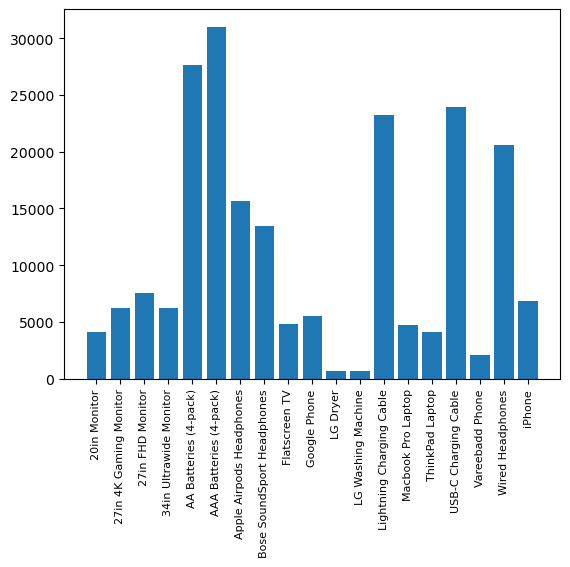

In [170]:

products = [product for product , df in all_data.groupby('Product')]
values = max_product['Quantity Ordered']
plt.bar(products,values)
plt.xticks(products, rotation= 'vertical', size=8)
plt.show()

In [202]:
product_price = all_data.groupby('Product').mean()['Price Each']

product_price

C:\Users\khale\AppData\Local\Temp\ipykernel_2000\3363967536.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_price = all_data.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

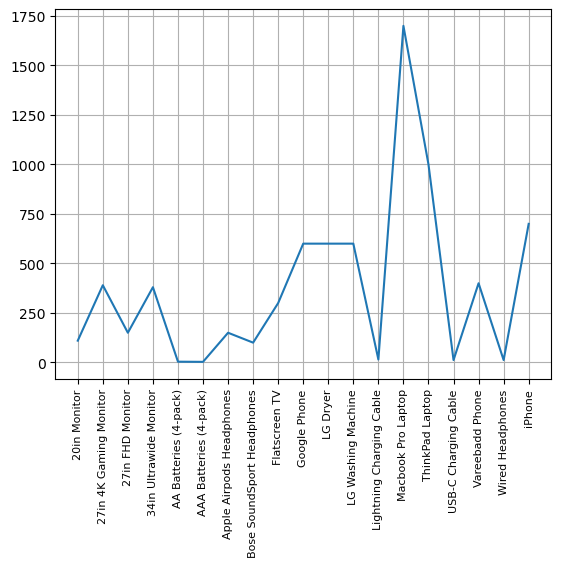

In [172]:
products = [product for product , df in all_data.groupby('Product')]
values = product_price
plt.plot(products,values)
plt.xticks(products, rotation= 'vertical', size=8)
plt.grid()
plt.show()


C:\Users\khale\AppData\Local\Temp\ipykernel_2000\3922246004.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, Prices, 'b-', color = 'green')
C:\Users\khale\AppData\Local\Temp\ipykernel_2000\3922246004.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products , rotation= 'vertical', size=8)


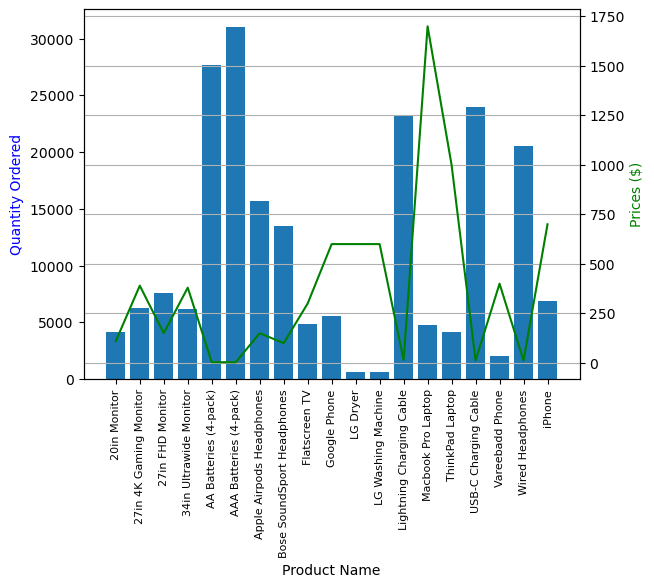

In [173]:
products = [product for product , df in all_data.groupby('Product')]
Prices = product_price
Quantity = max_product['Quantity Ordered']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity )
ax2.plot(products, Prices, 'b-', color = 'green')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered' , color = 'blue')
ax1.set_xticklabels(products , rotation= 'vertical', size=8)
ax2.set_ylabel('Prices ($)', color = 'green')

plt.grid()
plt.show()



